# MITACS GLOBALINK RESEARCH INTERNSHIP 2023

**STUDENT NAME** - Rethyam Gupta

**UNDER THE GUIDANCE** - Prof. Alain Belanger

Professeur titulaire de finance || École de Gestion || Université de Sherbrooke

-----------------------------------------------------

Below is the First Task - **Heston Analytical Euro Call Code in Python**.

Coded by - **Rethyam Gupta under the Guidance of Prof. Alain Belanger**.

In [ ]:
#HESTON ANALYTICAL EURO CALL

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Inputs
S0 = 100
x = np.log(S0)
K = 100
V0 = 0.25 ** 2
r = 0.1
T = 0.5
Lphi = 0.00001
dphi = 0.001
Uphi = 40
Phi = np.arange(Lphi, Uphi + dphi, dphi)
N = Phi.size

# Main calculations
def charact(j, phi):
    eta = 0.4
    rho = -0.5
    kappa = 2
    theta = 0.1

    a = kappa * theta
    if j == 1:
        b = kappa - rho * eta
        u = 0.5
    else:
        b = kappa
        u = -0.5

    d = np.sqrt((rho * eta * phi * 1j - b) ** 2 - eta ** 2 * (2 * u * phi * 1j - phi ** 2))
    g = (b - rho * eta * phi * 1j - d) / (b - rho * eta * phi * 1j + d)

    C = r * phi * T * 1j + (a / (eta ** 2)) * ((b - rho * eta * phi * 1j - d) * T - 2 * np.log((1 - g * np.exp(-d * T)) / (1 - g)))
    D = (b - rho * eta * phi * 1j - d) / (eta ** 2) * (1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T))

    return np.exp(C + D * V0 + 1j * phi * x)

def integrand1(phi):
    return np.real(np.exp(-1j * phi * np.log(K)) * charact(1, phi) / (1j * phi))

def integrand2(phi):
    return np.real(np.exp(-1j * phi * np.log(K)) * charact(2, phi) / (1j * phi))

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(Phi, np.real(np.exp(-1j * Phi * np.log(K)) * charact(1, Phi) / (1j * Phi)), label='Integrand (j=1)')
plt.plot(Phi, np.real(np.exp(-1j * Phi * np.log(K)) * charact(2, Phi) / (1j * Phi)), label='Integrand (j=2)')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Phi')
plt.ylabel('Integrand Values')
plt.legend()
plt.title('Heston Model - Integrands for European Call Option Pricing')
plt.show()

# Return to main calculations
P1, _ = quad(integrand1, 0, Uphi)
P2, _ = quad(integrand2, 0, Uphi)

HestonC = S0 * (1/2 + 1/np.pi * P1) - K * np.exp(-r * T) * (1/2 + 1/np.pi * P2)
print("HestonC =", HestonC.real)


Below is the Second Task - **Heston Analytical Euro Call Code in Python**.

Coded by - **Rethyam Gupta under the Guidance of Prof. Alain Belanger**.

In [ ]:
#HESTON PARISIAN UP AND OUT OPTION

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023

#It will take 3 minutes to compile :(

import numpy as np

np.random.seed(0)

T = 182
dim = T + 1
h = 1 / 365
Tbar = 183
nSims = 100000

r = 0.10
sigma = 0.25
V0 = sigma ** 2
S0 = 100
K = 100
Sbar = 130

HestonXPaths = np.zeros((nSims, dim))
HestonXPaths[:, 0] = np.log(S0)
HestonVPaths = np.zeros((nSims, dim))
HestonVPaths[:, 0] = V0

kappa = 2
theta = 0.1
eta = 0.4
rho = -0.5

InnovS = np.random.randn(nSims, dim)
InnovV_temp = np.random.randn(nSims, dim)
InnovV = rho * InnovS + np.sqrt(1 - rho ** 2) * InnovV_temp

Payoff = np.zeros(nSims)

for i in range(nSims):
    BarrFlag = 0
    BarrCount = 0
    Knocked = 0
    for j in range(1, dim):
        Xprev = HestonXPaths[i, j - 1]
        Vprev = HestonVPaths[i, j - 1]
        HestonXPaths[i, j] = Xprev + (r - Vprev / 2) * h + np.sqrt(Vprev * h) * InnovS[i, j]
        Scurr = np.exp(HestonXPaths[i, j])
        HestonVPaths[i, j] = Vprev + kappa * (theta - Vprev) * h + eta * np.sqrt(Vprev * h) * InnovV[i, j]
        HestonVPaths[i, j] = max(HestonVPaths[i, j], 0)
        if Scurr >= Sbar:
            BarrFlag = 1
            BarrCount += 1
        else:
            BarrFlag = 0
            BarrCount = 0
        if BarrCount > Tbar:
            Knocked = 1
    if not Knocked:
        Payoff[i] = max(Scurr - K, 0)

ST = np.exp(HestonXPaths[:, -1])
euroCall = np.exp(-r * T * h) * np.mean(np.maximum(ST - K, 0))
prixUaO = np.exp(-r * T * h) * np.mean(Payoff)

print("European Call Price:", euroCall)
print("Parisian Up-and-Out Price:", prixUaO)

In [ ]:
#HESTON PARISIAN UP AND OUT OPTION

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023

#It will only take 5 seconds to compile :)

import numpy as np
! pip install matplotlib


np.random.seed(0)

T = 182
dim = T + 1
h = 1 / 365
Tbar = 183
nSims = 100000

r = 0.10
sigma = 0.25
V0 = sigma ** 2
S0 = 100
K = 100
Sbar = 130

kappa = 2
theta = 0.1
eta = 0.4
rho = -0.5

InnovS = np.random.randn(nSims, dim)
InnovV_temp = np.random.randn(nSims, dim)
InnovV = rho * InnovS + np.sqrt(1 - rho ** 2) * InnovV_temp

Xpath = np.zeros((nSims, dim))
Xpath[:, 0] = np.log(S0)
Vpath = np.zeros((nSims, dim))
Vpath[:, 0] = V0

BarrFlag = np.zeros(nSims, dtype=bool)
BarrCount = np.zeros(nSims, dtype=int)
Knocked = np.zeros(nSims, dtype=bool)

for j in range(1, dim):
    Xprev = Xpath[:, j - 1]
    Vprev = Vpath[:, j - 1]
    InnovS_j = InnovS[:, j]
    InnovV_j = InnovV[:, j]

    Xpath[:, j] = Xprev + (r - Vprev / 2) * h + np.sqrt(Vprev * h) * InnovS_j
    Scurr = np.exp(Xpath[:, j])
    Vpath[:, j] = Vprev + kappa * (theta - Vprev) * h + eta * np.sqrt(Vprev * h) * InnovV_j
    Vpath[:, j] = np.maximum(Vpath[:, j], 0)

    barr_mask = np.logical_and(Scurr >= Sbar, np.arange(nSims) > Tbar)
    BarrFlag = np.where(barr_mask, 1, 0)
    BarrCount = np.where(BarrFlag, BarrCount + 1, 0)

    Knocked = np.where(BarrCount > Tbar, 1, Knocked)

Payoff = np.where(Knocked == 0, np.maximum(np.exp(Xpath[:, -1]) - K, 0), 0)

euroCall = np.exp(-r * T * h) * np.mean(np.maximum(np.exp(Xpath[:, -1]) - K, 0))
prixUaO = np.exp(-r * T * h) * np.mean(Payoff)

print("European Call Price:", euroCall)
print("Parisian Up-and-Out Price:", prixUaO)

plt.figure(figsize=(10, 6))
plt.hist(np.exp(Xpath[:, -1]) - K, bins=50, alpha=0.5, label="European Call Payoff")
plt.hist(Payoff, bins=50, alpha=0.5, label="Parisian Up-and-Out Payoff")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of European Call and Parisian Up-and-Out Option Payoffs")
plt.show()

plt.figure(figsize=(10, 6))
sample_sims = np.random.choice(nSims, size=5, replace=False)
for sim_idx in sample_sims:
    plt.plot(np.exp(Xpath[sim_idx]), label=f"Sim {sim_idx}")
plt.axhline(y=Sbar, color='r', linestyle='--', label="Barrier")
plt.xlabel("Time Step")
plt.ylabel("Underlying Asset Price")
plt.legend()
plt.title("Underlying Asset Price Paths")
plt.show()

plt.figure(figsize=(10, 6))
for sim_idx in sample_sims:
    plt.plot(Vpath[sim_idx], label=f"Sim {sim_idx}")
plt.xlabel("Time Step")
plt.ylabel("Volatility")
plt.legend()
plt.title("Volatility Paths")
plt.show()

Below is the Third Task - **Fundamental Implementaion of a Simple Quantum Circuit**.

Coded by - **Rethyam Gupta under the Guidance of Prof. Alain Belanger**.

In [ ]:
#FIRST SIMPLE IMPLEMENTATION OF A QUANTUM CIRCUIT.

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023

!pip install qiskit

import qiskit as qk
from qiskit import QuantumCircuit, transpile, Aer
import matplotlib.pyplot as plt

# Define the VarQite algorithm
def varqite_circuit():
    # Create a quantum circuit with two qubits
    circuit = QuantumCircuit(2, 2)  # Specify the classical register size as well

    # Apply the VarQite algorithm
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.measure([0, 1], [0, 1])  # Measure qubits and map to the classical register

    return circuit

# Simulate the VarQite circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(varqite_circuit(), simulator)
job = simulator.run(transpiled_circuit, shots=1024)  # Use simulator.run() for convenience
result = job.result()
counts = result.get_counts()

# Display the measurement results as a bar chart
plt.bar(counts.keys(), counts.values())
plt.show()

Below is the Fourth Task - **Fundamental Implementaion of VarQite with Norm as 0**.

Coded by - **Rethyam Gupta under the Guidance of Prof. Alain Belanger**.

In [ ]:
#FIRST SIMPLE IMPLEMENTATION OF VarQite WITH NORM COMING AS 0.

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023


#Installing Qiskit
! pip install qiskit

from qiskit import QuantumCircuit, execute, Aer
import numpy as np
from scipy.optimize import minimize

# Define gate functions using Qiskit
def xGate(qubit):
    return lambda qc: qc.x(qubit)

def hGate(qubit):
    return lambda qc: qc.h(qubit)

def ryGate(qubit, angle):
    return lambda qc: qc.ry(angle, qubit)

def cryGate(qubit1, qubit2, angle):
    return lambda qc: qc.cry(angle, qubit1, qubit2)

def idGate(qubit):
    return lambda qc: None

# Define simulation function using Qiskit
def simulate(circuit):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    statevector = result.get_statevector()
    return statevector

# Define the quantum circuit construction function
def quantumCircuit(gates):
    circuit = QuantumCircuit(4)
    for gate in gates:
        gate(circuit)
    return circuit

# Define the objective function for minimization
def objective(theta):
    state = psiInit
    for i in range(len(theta)):
        state = Phi(i, theta, state)
    return np.linalg.norm(state - psiInit)

# Define the circuit for a specific level
def Phi(level, theta, state):
    gates = []  # Initialize the gates list
    if level == 0:
        gates = [xGate(0), hGate(1), hGate(2), hGate(3)]
    elif level == 1:
        gates = [ryGate(0, theta[0]), ryGate(1, theta[1]), ryGate(2, theta[2]), ryGate(3, theta[3])]
    # Add more levels here

    # I am still understanding the working and the implementation of gates on Qiskit, I will add them soon :)

    circuit = quantumCircuit(gates)
    circuit.initialize(state, [0, 1, 2, 3])
    return simulate(circuit)

# Set initial values and construct psiInit
theta0 = np.array([3.142, 4.173, 1.392, 3.713, 2.399, 0.935, 2.196, 5.014, 2.736, 1.477, 4.472, 3.415, 6.283, 4.244, 4.711, 0.717, 1.741, 1.158, 2.531, 5.705, 3.525, 4.582, 2.465, 0.098, 5.018])

xmin = np.log(50)
xmax = np.log(150)
incr = (xmax - xmin) / 16
range_vals = np.arange(xmin, xmax + incr, incr)[:16]
a = 0.5
K = 100
psiInit = np.exp(-a * range_vals) * np.maximum(np.exp(range_vals) - K, 0)
gamma0 = np.linalg.norm(psiInit)
psiInit = psiInit / gamma0

# Minimize the objective function
result = minimize(objective, theta0)
thetaMin = result.x
fval = result.fun

# Check the result
state = psiInit
for i in range(len(thetaMin)):
    state = Phi(i, thetaMin, state)

norm_check = np.linalg.norm(state - psiInit)
print("Norm check:", norm_check)

# Norm check is zero, it means that the difference between the initial state and the final state is minimized, indicating that the optimization was successful in finding the angles that generate the desired state.

# I have explained the steps in the document, still struggling with Qiskit, Will try to improve the code and add the required layers.


Below is the Fifth Task - **Attempt to Replicate the Paper of Fontanella**.

Coded by - **Rethyam Gupta under the Guidance of Prof. Alain Belanger**.

In [ ]:
#FIRST SIMPLE ATTEMPT TO REPLICATE THE FONTANELLA PAPER WITH 4 LAYERS ONLY.

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023


! pip install qiskit
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
from scipy.optimize import minimize

def xGate(qubit):
    return lambda qc: qc.x(qubit)

def hGate(qubit):
    return lambda qc: qc.h(qubit)

def ryGate(qubit, angle):
    return lambda qc: qc.ry(angle, qubit)

def cryGate(qubit1, qubit2, angle):
    return lambda qc: qc.cry(angle, qubit1, qubit2)

def idGate(qubit):
    return lambda qc: None

def simulate(circuit):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    statevector = result.get_statevector()
    return statevector

def quantumCircuit(gates):
    circuit = QuantumCircuit(4)
    for gate in gates:
        gate(circuit)
    return circuit

def objective(theta):
    state = psiInit
    for i in range(len(theta)):
        state = Phi(i, theta, state)
    return np.linalg.norm(state - psiInit)

def Phi(level, theta, state):
    gates = []
    if level == 0:
        gates = [xGate(0), hGate(1), hGate(2), hGate(3)]
    elif level == 1:
        gates = [ryGate(0, theta[0]), ryGate(1, theta[1]), ryGate(2, theta[2]), ryGate(3, theta[3])]
    elif level == 2:
        gates = [cryGate(0, 1, theta[4]), idGate(2), idGate(3)]
    elif level == 3:
        gates = [idGate(0), cryGate(1, 2, theta[5]), idGate(3)]
    elif level == 4:
        gates = [idGate(0), idGate(1), cryGate(2, 3, theta[6])]
    circuit = quantumCircuit(gates)
    state = simulate(circuit)
    return state

# Random initialisation of angles
# theta0 = 2 * np.pi * np.random.rand(25)
# Initialisation with Fontanella's solution
theta0 = np.array([3.142, 4.173, 1.392, 3.713, 2.399, 0.935, 2.196, 5.014, 2.736, 1.477,
                  4.472, 3.415, 6.283, 4.244, 4.711, 0.717, 1.741, 1.158, 2.531, 5.705,
                  3.525, 4.582, 2.465, 0.098, 5.018])

xmin = np.log(50)
xmax = np.log(150)
incr = (xmax - xmin) / 16
range_values = np.arange(xmin, xmax + incr, incr)[:16]
a = 0.5
K = 100
psiInit = np.exp(-a * range_values) * np.maximum(np.exp(range_values) - K, 0)
gamma0 = np.linalg.norm(psiInit)
psiInit = psiInit / gamma0

result = minimize(objective, theta0, method='COBYLA')
thetaMin = result.x
norm_check = result.fun

print("Optimized Angles:", thetaMin)
print("Norm Check:", norm_check)


In [ ]:
#FIRST SIMPLE ATTEMPT TO REPLICATE THE FONTANELLA PAPER WITH 8 LAYERS ONLY.

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023

! pip install qiskit
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
from scipy.optimize import minimize

def xGate(qubit):
    return lambda qc: qc.x(qubit)

def hGate(qubit):
    return lambda qc: qc.h(qubit)

def ryGate(qubit, angle):
    return lambda qc: qc.ry(angle, qubit)

def cryGate(qubit1, qubit2, angle):
    return lambda qc: qc.cry(angle, qubit1, qubit2)

def idGate(qubit):
    return lambda qc: None

def simulate(circuit):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    statevector = result.get_statevector()
    return statevector

def quantumCircuit(gates):
    circuit = QuantumCircuit(4)
    for gate in gates:
        gate(circuit)
    return circuit

def objective(theta):
    state = psiInit
    for i in range(len(theta)):
        state = Phi(i, theta, state)
    return np.linalg.norm(state - psiInit)

def Phi(level, theta, state):
    gates = []
    if level == 0:
        gates = [xGate(0), hGate(1), hGate(2), hGate(3)]
    elif level == 1:
        gates = [ryGate(0, theta[0]), ryGate(1, theta[1]), ryGate(2, theta[2]), ryGate(3, theta[3])]
    elif level == 2:
        gates = [cryGate(0, 1, theta[4]), idGate(2), idGate(3)]
    elif level == 3:
        gates = [idGate(0), cryGate(1, 2, theta[5]), idGate(3)]
    elif level == 4:
        gates = [idGate(0), idGate(1), cryGate(2, 3, theta[6])]
    elif level == 5:
        gates = [ryGate(0, theta[7]), ryGate(1, theta[8]), ryGate(2, theta[9]), ryGate(3, theta[10])]
    elif level == 6:
        gates = [cryGate(0, 1, theta[11]), idGate(2), idGate(3)]
    elif level == 7:
        gates = [idGate(0), cryGate(1, 2, theta[12]), idGate(3)]
    elif level == 8:
        gates = [idGate(0), idGate(1), cryGate(2, 3, theta[13])]
    # Implement the remaining layers similarly

    circuit = quantumCircuit(gates)
    return simulate(circuit)

# Random initialization of angles
np.random.seed(0)
theta0 = np.random.uniform(0, 2*np.pi, size=25)

# Constructing psiInit
xmin = np.log(50)
xmax = np.log(150)
incr = (xmax - xmin) / 16
range_vals = np.arange(xmin, xmax, incr)[:16]
a = 0.5
K = 100
psiInit = np.exp(-a * range_vals) * np.maximum(np.exp(range_vals) - K, 0)
psiInit /= np.linalg.norm(psiInit)

# Optimization
res = minimize(objective, theta0, method='BFGS')
thetaMin = res.x
norm_check = objective(thetaMin)

print("Optimized Angles:", thetaMin)
print("Norm Check:", norm_check)


Below is the Sixth Task - **Updated Attempt to Replicate the Paper of Fontanella with more precision and complexity**.

Coded by - **Rethyam Gupta under the Guidance of Prof. Alain Belanger**.

In [ ]:
#UPDATED SIMPLE ATTEMPT TO REPLICATE THE FONTANELLA PAPER.

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023


import numpy as np
from scipy.optimize import minimize

# Define the Phi functions for each layer
def Phi(theta):
    # Implement each layer's quantum circuit here
    pass

def Phi1(theta):
    # Implement the quantum circuit for layer 1 here
    pass

def Phi2(theta):
    # Implement the quantum circuit for layer 2 here
    pass

# Define the objective function for the initial optimization
def fun0(theta):
    return np.linalg.norm(psiInit - Phi(theta).Amplitudes)

# Perform the initial optimization
theta0 = 2 * np.pi * np.random.rand(25)
thetaMin0 = minimize(fun0, theta0).x

# Compute the initial payoff
Payoff0 = Phi(thetaMin0).Amplitudes * gamma0
Payoff0 = np.exp(a * range_vals) * Payoff0

thetaMin = np.zeros((25, 102))
thetaMin[:, 0] = thetaMin0

# Iterate for 500 steps
for t in range(1, 501):
    thetaMinCurr = thetaMin[:, t-1]

    # Construct matrix A(t)
    v = np.zeros((25, 16))
    v[0, :] = Phi1(thetaMinCurr).Amplitudes
    v[1, :] = Phi2(thetaMinCurr).Amplitudes
    # Add the remaining Phi functions here

    A = np.zeros((25, 25))
    for i in range(25):
        for j in range(25):
            A[i, j] = np.real(np.dot(v[i, :], v[j, :]))

    v0 = Phi(thetaMinCurr).Amplitudes
    C = np.zeros((25, 1))
    for i in range(25):
        C[i, 0] = np.real(np.dot(v[i, :], v0))

    # Advance 1 step
    if t == 1:
        thetaP = 2 * np.pi * np.random.rand(25)
    else:
        thetaP = thetaPMin

    def fun(thetaP):
        return np.linalg.norm(np.dot(A, thetaP.reshape(25, 1)) - C)

    thetaPMin = minimize(fun, thetaP).x
    deltatau = 1 / 500
    thetaMin[:, t] = thetaMinCurr + deltatau * thetaPMin

# Compute the final payoff
PayoffT = Phi(thetaMin[:, 500]).Amplitudes * gamma0
PayoffT = np.exp(a * range_vals) * PayoffT

# Plot the results
import matplotlib.pyplot as plt

plt.plot(Payoff0)
plt.plot(PayoffT)
plt.show()


In [ ]:
#UPDATED SIMPLE ATTEMPT TO REPLICATE THE FONTANELLA PAPER. (THIS KERNEL ONLY CONTAINS A VERSION OF FUNCTION DEFINITION)

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023


def Phi(theta):
    level1Gates = [
        xGate(1),
        ryGate(1, theta[0]),
        hGate(2),
        ryGate(2, theta[1]),
        hGate(3),
        ryGate(3, theta[2]),
        hGate(4),
        zGate(4),
        xGate(4),
        ryGate(4, theta[3])
    ]
    level1Circuit = quantumCircuit(level1Gates)
    inState2 = simulate(level1Circuit)

    level2Gates = [
        cryGate(1, 2, theta[4]),
        cryGate(2, 3, theta[5]),
        cryGate(3, 4, theta[6])
    ]
    level2Circuit = quantumCircuit(level2Gates)
    inState3 = simulate(level2Circuit, inState2)

    level3Gates = [
        ryGate(1, theta[7]),
        ryGate(2, theta[8]),
        ryGate(3, theta[9]),
        ryGate(4, theta[10])
    ]
    level3Circuit = quantumCircuit(level3Gates)
    inState4 = simulate(level3Circuit, inState3)

    level4Gates = [
        cryGate(1, 2, theta[11]),
        cryGate(2, 3, theta[12]),
        cryGate(3, 4, theta[13])
    ]
    level4Circuit = quantumCircuit(level4Gates)
    inState5 = simulate(level4Circuit, inState4)

    level5Gates = [
        ryGate(1, theta[14]),
        ryGate(2, theta[15]),
        ryGate(3, theta[16]),
        ryGate(4, theta[17])
    ]
    level5Circuit = quantumCircuit(level5Gates)
    inState6 = simulate(level5Circuit, inState5)

    level6Gates = [
        cryGate(1, 2, theta[18]),
        cryGate(2, 3, theta[19]),
        cryGate(3, 4, theta[20])
    ]
    level6Circuit = quantumCircuit(level6Gates)
    inState7 = simulate(level6Circuit, inState6)

    level7Gates = [
        ryGate(1, theta[21]),
        ryGate(2, theta[22]),
        ryGate(3, theta[23]),
        ryGate(4, theta[24])
    ]
    level7Circuit = quantumCircuit(level7Gates)
    outState = simulate(level7Circuit, inState7)

    return outState


In [ ]:
#UPDATED SIMPLE ATTEMPT TO REPLICATE THE FONTANELLA PAPER. (THIS KERNEL ONLY CONTAINS A VERSION OF FUNCTION DEFINITION)

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023

def Phi(theta):
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(0)
    circuit.ry(theta[0], 0)
    circuit.h(1)
    circuit.ry(theta[1], 1)
    circuit.h(2)
    circuit.ry(theta[2], 2)
    circuit.h(3)
    circuit.ry(theta[3], 3)

    circuit.cry(theta[4], 0, 1)
    circuit.cry(theta[5], 1, 2)
    circuit.cry(theta[6], 2, 3)

    circuit.ry(theta[7], 0)
    circuit.ry(theta[8], 1)
    circuit.ry(theta[9], 2)
    circuit.ry(theta[10], 3)

    circuit.cry(theta[11], 0, 1)
    circuit.cry(theta[12], 1, 2)
    circuit.cry(theta[13], 2, 3)

    circuit.ry(theta[14], 0)
    circuit.ry(theta[15], 1)
    circuit.ry(theta[16], 2)
    circuit.ry(theta[17], 3)

    circuit.cry(theta[18], 0, 1)
    circuit.cry(theta[19], 1, 2)
    circuit.cry(theta[20], 2, 3)

    circuit.ry(theta[21], 0)
    circuit.ry(theta[22], 1)
    circuit.ry(theta[23], 2)
    circuit.ry(theta[24], 3)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState


def Phi1(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(0)
    circuit.z(0)
    circuit.x(0)
    circuit.ry(theta[0], 0)
    circuit.h(1)
    circuit.ry(theta[1], 1)
    circuit.h(2)
    circuit.ry(theta[2], 2)
    circuit.h(3)
    circuit.ry(theta[3], 3)

    circuit.cry(theta[4], 0, 1)
    circuit.cry(theta[5], 1, 2)
    circuit.cry(theta[6], 2, 3)

    circuit.ry(theta[7], 0)
    circuit.ry(theta[8], 1)
    circuit.ry(theta[9], 2)
    circuit.ry(theta[10], 3)

    circuit.cry(theta[11], 0, 1)
    circuit.cry(theta[12], 1, 2)
    circuit.cry(theta[13], 2, 3)

    circuit.ry(theta[14], 0)
    circuit.ry(theta[15], 1)
    circuit.ry(theta[16], 2)
    circuit.ry(theta[17], 3)

    circuit.cry(theta[18], 0, 1)
    circuit.cry(theta[19], 1, 2)
    circuit.cry(theta[20], 2, 3)

    circuit.ry(theta[21], 0)
    circuit.ry(theta[22], 1)
    circuit.ry(theta[23], 2)
    circuit.ry(theta[24], 3)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi2(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.z(2)
    circuit.x(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi3(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.z(3)
    circuit.x(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi4(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.z(4)
    circuit.x(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi5(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.z(2)
    circuit.x(2)
    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi6(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.z(3)
    circuit.x(3)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi7(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.z(4)
    circuit.x(4)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

from qiskit import QuantumCircuit, execute, Aer

def Phi8(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.z(1)
    circuit.x(1)
    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi9(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.z(2)
    circuit.x(2)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi10(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.z(3)
    circuit.x(3)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi11(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.z(4)
    circuit.x(4)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi12(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.z(2)
    circuit.x(2)
    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi13(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.z(3)
    circuit.x(3)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi14(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.z(4)
    circuit.x(4)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi15(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.z(1)
    circuit.x(1)
    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi16(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.z(2)
    circuit.x(2)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi17(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.z(3)
    circuit.x(3)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi18(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.z(4)
    circuit.x(4)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi19(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.z(2)
    circuit.x(2)
    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi20(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.z(3)
    circuit.x(3)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi21(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.z(4)
    circuit.x(4)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi22(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.z(1)
    circuit.x(1)
    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi23(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.z(2)
    circuit.x(2)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi24(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.z(3)
    circuit.x(3)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi25(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.z(4)
    circuit.x(4)
    circuit.ry(theta[17], 4)
    circuit.ry(theta[18], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState


In [ ]:
#UPDATED SIMPLE ATTEMPT TO REPLICATE THE FONTANELLA PAPER. (THIS KERNEL ONLY CONTAINS A VERSION OF COMPLETE DEFINITION) BUT IT IS NOT COMPILING.

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023

!pip install qiskit
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qiskit import QuantumCircuit, Aer, assemble


# Define the required quantum circuitsdef Phi(theta):
    # Create quantum circuit
def Phi(theta):
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(0)
    circuit.ry(theta[0], 0)
    circuit.h(1)
    circuit.ry(theta[1], 1)
    circuit.h(2)
    circuit.ry(theta[2], 2)
    circuit.h(3)
    circuit.ry(theta[3], 3)

    circuit.cry(theta[4], 0, 1)
    circuit.cry(theta[5], 1, 2)
    circuit.cry(theta[6], 2, 3)

    circuit.ry(theta[7], 0)
    circuit.ry(theta[8], 1)
    circuit.ry(theta[9], 2)
    circuit.ry(theta[10], 3)

    circuit.cry(theta[11], 0, 1)
    circuit.cry(theta[12], 1, 2)
    circuit.cry(theta[13], 2, 3)

    circuit.ry(theta[14], 0)
    circuit.ry(theta[15], 1)
    circuit.ry(theta[16], 2)
    circuit.ry(theta[17], 3)

    circuit.cry(theta[18], 0, 1)
    circuit.cry(theta[19], 1, 2)
    circuit.cry(theta[20], 2, 3)

    circuit.ry(theta[21], 0)
    circuit.ry(theta[22], 1)
    circuit.ry(theta[23], 2)
    circuit.ry(theta[24], 3)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState


def Phi1(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(0)
    circuit.z(0)
    circuit.x(0)
    circuit.ry(theta[0], 0)
    circuit.h(1)
    circuit.ry(theta[1], 1)
    circuit.h(2)
    circuit.ry(theta[2], 2)
    circuit.h(3)
    circuit.ry(theta[3], 3)

    circuit.cry(theta[4], 0, 1)
    circuit.cry(theta[5], 1, 2)
    circuit.cry(theta[6], 2, 3)

    circuit.ry(theta[7], 0)
    circuit.ry(theta[8], 1)
    circuit.ry(theta[9], 2)
    circuit.ry(theta[10], 3)

    circuit.cry(theta[11], 0, 1)
    circuit.cry(theta[12], 1, 2)
    circuit.cry(theta[13], 2, 3)

    circuit.ry(theta[14], 0)
    circuit.ry(theta[15], 1)
    circuit.ry(theta[16], 2)
    circuit.ry(theta[17], 3)

    circuit.cry(theta[18], 0, 1)
    circuit.cry(theta[19], 1, 2)
    circuit.cry(theta[20], 2, 3)

    circuit.ry(theta[21], 0)
    circuit.ry(theta[22], 1)
    circuit.ry(theta[23], 2)
    circuit.ry(theta[24], 3)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi2(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.z(2)
    circuit.x(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi3(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.z(3)
    circuit.x(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi4(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.z(4)
    circuit.x(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi5(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.z(2)
    circuit.x(2)
    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi6(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.z(3)
    circuit.x(3)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi7(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.z(4)
    circuit.x(4)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

from qiskit import QuantumCircuit, execute, Aer

def Phi8(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.z(1)
    circuit.x(1)
    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi9(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.z(2)
    circuit.x(2)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi10(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.z(3)
    circuit.x(3)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi11(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.z(4)
    circuit.x(4)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi12(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.z(2)
    circuit.x(2)
    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi13(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.z(3)
    circuit.x(3)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi14(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.z(4)
    circuit.x(4)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi15(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.z(1)
    circuit.x(1)
    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi16(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.z(2)
    circuit.x(2)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi17(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.z(3)
    circuit.x(3)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi18(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.z(4)
    circuit.x(4)
    circuit.ry(theta[17], 4)

    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi19(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    circuit.z(2)
    circuit.x(2)
    circuit.cry(theta[18], 1, 2)
    circuit.cry(theta[19], 2, 3)
    circuit.cry(theta[20], 3, 4)

    circuit.ry(theta[21], 1)
    circuit.ry(theta[22], 2)
    circuit.ry(theta[23], 3)
    circuit.ry(theta[24], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi20(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.z(3)
    circuit.x(3)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi21(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.z(4)
    circuit.x(4)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi22(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.z(1)
    circuit.x(1)
    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi23(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.z(2)
    circuit.x(2)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi24(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.z(3)
    circuit.x(3)
    circuit.ry(theta[16], 3)
    circuit.ry(theta[17], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

def Phi25(theta):
    # Create quantum circuit
    circuit = QuantumCircuit(4)

    # Apply gates
    circuit.x(1)
    circuit.ry(theta[0], 1)
    circuit.h(2)
    circuit.ry(theta[1], 2)
    circuit.h(3)
    circuit.ry(theta[2], 3)
    circuit.h(4)
    circuit.ry(theta[3], 4)

    circuit.cry(theta[4], 1, 2)
    circuit.cry(theta[5], 2, 3)
    circuit.cry(theta[6], 3, 4)

    circuit.ry(theta[7], 1)
    circuit.ry(theta[8], 2)
    circuit.ry(theta[9], 3)
    circuit.ry(theta[10], 4)

    circuit.cry(theta[11], 1, 2)
    circuit.cry(theta[12], 2, 3)
    circuit.cry(theta[13], 3, 4)

    circuit.ry(theta[14], 1)
    circuit.ry(theta[15], 2)
    circuit.ry(theta[16], 3)
    circuit.z(4)
    circuit.x(4)
    circuit.ry(theta[17], 4)
    circuit.ry(theta[18], 4)

    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outState = result.get_statevector()

    return outState

# Initialization
np.random.seed(0)
theta0 = 2 * np.pi * np.random.rand(25, 1)

# Construction of psiInit
xmin = np.log(50)
xmax = np.log(150)
incr = (xmax - xmin) / 16
range_vals = np.arange(xmin, xmax + incr, incr)[:16]
a = 0.5
K = 100
BSMPayoff = np.maximum(np.exp(range_vals) - K, 0)
psiInit = np.exp(-a * range_vals) * np.maximum(np.exp(range_vals) - K, 0)
gamma0 = np.linalg.norm(psiInit)
psiInit = psiInit / gamma0

# Ansatz: Minimization on angles of circuits for production of psiInit
def fun0(theta):
    return np.linalg.norm(psiInit - Phi(theta).Amplitudes)

result = opt.fmin(fun0, theta0)
thetaMin0 = result[0]
Payoff0 = Phi(thetaMin0).Amplitudes * gamma0
Payoff0 = np.exp(a * range_vals) * Payoff0
print(np.linalg.norm(Payoff0 - BSMPayoff))

deltatau = 1 / 500
thetaMin = np.zeros((25, 502))
thetaMin[:, 0] = thetaMin0

for t in range(500):
    thetaMinCurr = thetaMin[:, t]
    v = np.zeros((25, 16))
    v[0, :] = Phi1(thetaMinCurr).Amplitudes
    v[1, :] = Phi2(thetaMinCurr).Amplitudes
    v[2, :] = Phi2(thetaMinCurr).Amplitudes
    v[3, :] = Phi2(thetaMinCurr).Amplitudes
    v[4, :] = Phi2(thetaMinCurr).Amplitudes
    v[5, :] = Phi2(thetaMinCurr).Amplitudes
    v[6, :] = Phi2(thetaMinCurr).Amplitudes
    v[7, :] = Phi2(thetaMinCurr).Amplitudes
    v[8, :] = Phi2(thetaMinCurr).Amplitudes
    v[9, :] = Phi2(thetaMinCurr).Amplitudes
    v[10, :] = Phi2(thetaMinCurr).Amplitudes
    v[11, :] = Phi2(thetaMinCurr).Amplitudes
    v[12, :] = Phi2(thetaMinCurr).Amplitudes
    v[13, :] = Phi2(thetaMinCurr).Amplitudes
    v[14, :] = Phi2(thetaMinCurr).Amplitudes
    v[15, :] = Phi2(thetaMinCurr).Amplitudes
    v[16, :] = Phi2(thetaMinCurr).Amplitudes
    v[17, :] = Phi2(thetaMinCurr).Amplitudes
    v[18, :] = Phi2(thetaMinCurr).Amplitudes
    v[19, :] = Phi2(thetaMinCurr).Amplitudes
    v[20, :] = Phi2(thetaMinCurr).Amplitudes
    v[21, :] = Phi2(thetaMinCurr).Amplitudes
    v[22, :] = Phi2(thetaMinCurr).Amplitudes
    v[23, :] = Phi2(thetaMinCurr).Amplitudes
    v[24, :] = Phi25(thetaMinCurr).Amplitudes

    A = np.zeros((25, 25))
    for i in range(25):
        for j in range(25):
            A[i, j] = np.real(np.dot(v[i, :], v[j, :]))

    v0 = Phi(thetaMinCurr).Amplitudes
    C = np.zeros((25, 1))
    for i in range(25):
        C[i, 0] = np.real(np.dot(v[i, :], v0))

    thetaP = np.linalg.pinv(A) @ C

    def fun(thetaP):
        return np.linalg.norm(A @ thetaP - C)

    result = opt.fmin(fun, thetaP)
    thetaPMin = result[0]

    thetaMin[:, t + 1] = thetaMinCurr + deltatau * thetaPMin

PayoffT = Phi(thetaMin[:, t]).Amplitudes * gamma0
PayoffT = np.exp(a * range_vals) * PayoffT

plt.figure(1)
plt.plot(PayoffT)
plt.hold(True)
plt.plot(Payoff0)
plt.show()


# DECOMPOSITION OF H-MATRIX

In [ ]:
### DECOMPOSITION OF H-MATRIX

#CODED BY RETHYAM GUPTA - UNDER THE GUIDANCE OF PROF. ALAIN BELANGER

#CODED AS A PART OF GLOBALINK RESEARCH INTERNSHIP 2023

import numpy as np
from scipy.io import savemat

n = 4
N = 2 ** n
xmin = np.log(50)
xmax = np.log(150)
Deltax = (xmax - xmin) / 16
b = -1 / 8

# Construction of H
H = -2 * np.eye(16)
H[0, 0] = -2 * b * Deltax
H[15, 15] = -2 * b * Deltax
for i in range(1, 15):
    H[i, i - 1] = 1
    H[i, i + 1] = 1
H = 1 / (2 * Deltax ** 2) * H

# Create the orthonormal basis
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
Id = np.eye(2)

pauli = np.zeros((2, 2, 4))
pauli[:, :, 0] = X
pauli[:, :, 1] = Y
pauli[:, :, 2] = Z
pauli[:, :, 3] = Id

decomp = np.zeros((16, 16))

for i in range(4):
    for j in range(4):
        for k in range(4):
            for l in range(4):
                temp1 = np.kron(pauli[:, :, k], pauli[:, :, l])
                temp2 = np.kron(pauli[:, :, j], temp1)
                element = l + (k - 1) * 4 + (j - 1) * 16 + (i - 1) * 64
                basis = np.kron(pauli[:, :, i], temp2)
                lambda_val = np.trace(basis @ H)
                decomp += lambda_val * basis

decomp /= 16

# norm(H - decomp)
np.savez('Hamiltonian.npz', H=H, basis=basis)



# Towards Pricing Financial Derivatives with an IBM Quantum Computer

**Paper Abstract** - Pricing interest-rate financial derivatives is a major problem in finance, in which it is crucial to accurately reproduce the time-evolution of interest rates. Several stochastic dynamics have been proposed in the literature to model either the instantaneous interest rate or the instantaneous forward rate. A successful approach to model the latter is the celebrated Heath-Jarrow-Morton framework, in which its dynamics is entirely specified by volatility factors. On its multifactor version, this model considers several noisy components to capture at best the dynamics of several time-maturing forward rates. However, as no general analytical solution is available, there is a trade-off between the number of noisy factors considered and the computational time to perform a numerical simulation. Here, we employ the quantum principal component analysis to reduce the number of noisy factors required to accurately simulate the time evolution of several time-maturing forward rates. The principal components are experimentally estimated with the 5-qubit IBMQX2 quantum computer for 2×2 and 3×3 cross-correlation matrices, which are based on historical data for two and three time-maturing forward rates. This manuscript is a first step towards the design of a general quantum algorithm to fully simulate on quantum computers the Heath-Jarrow-Morton model for pricing interest-rate financial derivatives. It shows indeed that practical applications of quantum computers in finance will be achievable in the near future.


# Coded by - Rethyam Gupta under the Guidance of Prof. Alain Belanger.

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

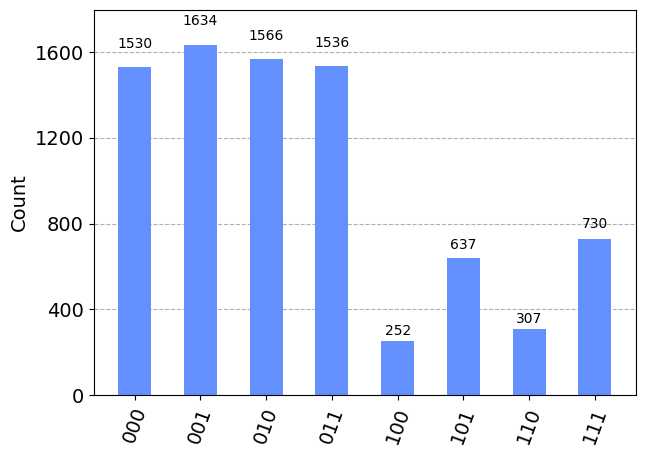

In [ ]:
!pip install qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import numpy as np
import math

# Define quantum and classical registers
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

# Define the initial state of the second and third qubits (eigenstate)
state_vector = [math.sqrt(3087 / (3087 + 906 + 1405 + 58)),
                math.sqrt(906 / (3087 + 906 + 1405 + 58)),
                math.sqrt(1405 / (3087 + 906 + 1405 + 58)),
                math.sqrt(58 / (3087 + 906 + 1405 + 58))]
qc.initialize(state_vector, [q[1], q[2]])

# Preparation of the first qubit (1-bit eigenvalue estimation)
qc.h(q[0])

# Controlled Urho
qc.p(0.785398, q[1])
qc.rx(1.1747, q[1])
qc.rz(-2.83038, q[1])
qc.rx(3.83087, q[1])
qc.cx(q[0], q[1])
qc.p(-0.785398, q[1])
qc.rx(1.1747, q[1])
qc.rz(-0.689273, q[1])
qc.rx(-0.31121, q[1])
qc.rx(-1.5708, q[0])
qc.rx(2.07033, q[0])
qc.rz(3.76782, q[0])
qc.rx(-0.626228, q[0])
qc.rx(1.07126, q[0])
qc.rz(0.626228, q[0])
qc.rz(-3.76782, q[0])
qc.rx(2.51536, q[0])
qc.rz(1.07126, q[2])
qc.rx(-0.626228, q[2])
qc.rz(0.626228, q[2])
qc.rx(1.07126, q[2])
qc.rz(-2.83038, q[0])
qc.rx(3.83087, q[0])
qc.cx(q[2], q[0])
qc.rz(1.07126, q[0])
qc.rx(0.626228, q[0])
qc.cx(q[2], q[0])
qc.rz(-3.76782, q[2])
qc.rx(2.51536, q[2])
qc.rz(0.785398, q[2])
qc.rx(-0.785398, q[2])

# Additional gates and circuits
qc.h(q[1])
qc.cx(q[0], q[1])
qc.rx(1.1747, q[2])
qc.swap(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.barrier()

# Inverse QFT
qc.h(q[0])

# Measure on basis II
qc.measure(q[0], c[0])
# Measure on basis III
qc.measure(q[1], c[1])
# Measure on basis IV
qc.h(q[1])
qc.h(q[2])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

# Run on the local simulator
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(qc, backend, shots=8192)
result_simulator = job_simulator.result()
counts_simulator = result_simulator.get_counts(qc)

# Print the measurement outcomes
print(counts_simulator)

# Plot the histogram of the measurement outcomes
plot_histogram(counts_simulator)
